<a href="https://colab.research.google.com/github/yebiny/Brain_Tumor_Classify/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀 (Linear Regression)
>**목차**
1. 개념정리
2. 손실함수: 평균제곱오차 (Mean Squared Error)
3. 최적화: 경사하강법 (Gradient Descent) 
4. 실습1: 단순선형회귀분석(Simple Linear Regression Analysis)
5. 실습2: 다중선형회귀분석(Multiple Linear Regression Analysis)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---

</br>

###<center> < 가설 > </center>
###  <center>$f(x_i)=wx_i+b$</center>

</br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-f(x_i) )^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-wx_i-b)^2$</center>

### **구현**


In [ ]:
def hypothesis(x, w=1, b=0):
  return np.dot(w,x)+b

### **예제**

|공부시간|종합점수|
|------|---|
|1|1.1|
|2|1.2|
|3|2.2|
|4|3.1|
|5|3.7|

* 데이터 정의

In [ ]:
x = [1,2,3,4,5]
y = [1.1,1.2,2.3,3.1,3.7]

* 예측

In [10]:
y_pred = hypothesis(x)
print(y_pred)

[1 2 3 4 5]


* 시각화

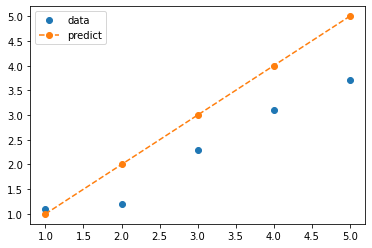

In [ ]:
plt.plot(x, y , marker='o', linestyle='')
plt.plot(x, y_pred, marker='o', linestyle='--')
plt.legend(["data", "predict"])
plt.show()

## 2. 손실함수: 평균제곱오차 (Mean Squred Error)
---

</br>

### <center>$ MSE = \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>

### <center>$=\sum_{i=1}^m(y_i-wx_i-b)^2$

### **구현**

In [ ]:
def mse(y, y_pred):
  error=0
  for i in range(len(y)):
    error += (y[i]-y_pred[i])**2
  return error

def mse(y, y_pred):
  return np.sum([(yi-yi_pred)**2 for yi, yi_pred in zip(y, y_pred)])

* 계산

In [ ]:
error = mse(y, y_pred)
print(error)

3.6399999999999997


### **Error 시각화**

*  W 값에 따른 Error 값 변화

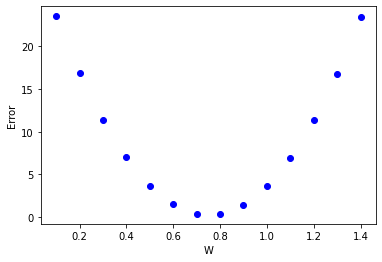

In [ ]:
W = np.arange(0.1, 1.5, 0.1)

for w in W:
  y_pred = hypothesis(x, W=w)
  error = mse(y, y_pred)
  plt.plot(w, error, marker='o', color='b')

plt.xlabel("W")
plt.ylabel("Error")
plt.show()

## 3. 최적화: 경사하강법 ( Gradient Desent )
---
</br>

## <center>$w^* =  w-\alpha\frac{\theta }{\theta w}Cost(w) $</center>


<center> 기울기가 음수일 때: $\frac{\theta }{\theta w}Cost(w) < 0 \rightarrow w* = w+\alpha*(기울기)$</center>
<center>기울기가 음수이면 $w$는 지금보다 큰 값으로 업데이트</center>

</br>

<center> 기울기가 양수일 때: $\frac{\theta }{\theta w}Cost(w) > 0 \rightarrow w* = w-\alpha*(기울기)$</center>
<center>기울기가 양수이면 $w$는 지금보다 작은 값으로 업데이트</center>


### **구현**

In [ ]:
def gradient(xi, yi, w):
  return 2*xi**2*w-2*xi*yi  

def gradient_desent(xi, yi, w, alpha=0.01):
  return w-(alpha*gradient(xi, yi, w))

### **학습**

In [ ]:
w=1
for xi, yi in zip(x, y):
  w = gradient_desent(xi, yi, w)
  print(w)

1.002
0.96984
0.9332688
0.882622784
0.811311392


### **파라미터**: $\alpha$ 값에 따른 W 변화

In [ ]:
w=1
for xi, yi in zip(x, y):
  w = gradient_desent(xi, yi, w, alpha=0.02)
  print(w)

1.004
0.93936
0.8771903999999999
0.811788544
0.74


## 4. 실습1: 단순 선형 회귀 분석(Simple Linear Regression Analysis)
---

<br>

###  <center>$f(x_i)=wx_i+b$</center>



### **데이터**

|공부시간|종합점수|
|------|---|
|0|0|
|1|11|
|2|23|
|3|30|
|4|44|
|5|55|
|6|61|
|7|73|
|8|84|
|9|98|



* 데이터 정의

In [ ]:
x = [0,1,2,3,4,5,6,7,8,9]
y = [0,11,23,30,44,55,61,73,84,98]

* 시각화

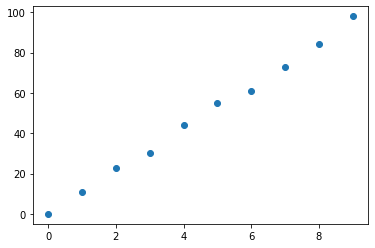

In [ ]:
plt.plot(x,y, linestyle='', marker='o')
plt.show()

### **모델 생성**

* 케라스를 이용한 모델 구현

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* 학습파라미터 확인

In [ ]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[-1.6239752]], dtype=float32), array([0.], dtype=float32)]
W: [[-1.6239752]] b: [0.]


* 학습파라미터 시각화

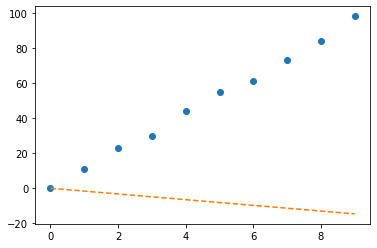

In [ ]:
plt.plot(x,y, linestyle='', marker='o')
plt.plot(x, model.predict(x), linestyle='--')
plt.show()

### **학습**

* 모델 컴파일

In [ ]:
model.compile(optimizer = optimizers.SGD(learning_rate=0.01),
              loss = 'mse',
              metrics=['mse']
              )

* 학습 진행

In [ ]:
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 515ms/step - loss: 2490.0242 - mse: 2490.0242
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 432.8708 - mse: 432.8708
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 77.4677 - mse: 77.4677
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 16.0636 - mse: 16.0636
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 5.4515 - mse: 5.4515
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 3.6144 - mse: 3.6144
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 3.2934 - mse: 3.2934
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 3.2343 - mse: 3.2343
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 3.2205 - mse: 3.2205
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 3.2146 - mse: 3.2146


### **결과**

* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[10.405892]], dtype=float32), array([1.3866898], dtype=float32)]
W: [[10.405892]] b: [1.3866898]


* 시각화

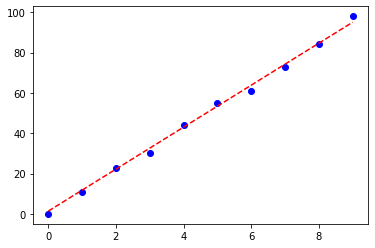

In [ ]:
plt.plot(x, y, 'b', linestyle='', marker='o')
plt.plot(x, model.predict(x), 'r', linestyle='--', marker='')
plt.show()

* 결과예측

In [ ]:
print(model.predict([11]))

[[115.8515]]


## 5. 실습2: 다중선형회귀 (Multiple Linear Regression Analysis)
---
<br>

###  <center>$f(\vec{x_i})=\vec{w}\vec{x}_i+b$</center>

### **데이터**
|공부시간|집중도|수면시간|종합성적|
|------|---|---|---|
|0|1|9|0|
|1|1|8.5|11|
|2|2|8|23|
|3|4|8|30|
|4|3|7|44|
|5|5|7.5|55|
|6|6|7|61|
|7|6|6|73|
|8|7|7|84|
|9|6|6.5|98|



* 데이터 정의

In [ ]:
x = [[0,1,9],
      [1,1,8.5],
      [2,2,8],
      [3,4,8],
      [4,3,7],
      [5,5,7.5],
      [6,6,7],
      [7,6,6],
      [8,7,7],
      [9,6,6.5 ]
     ]
y = [0,11,23,30,44,55,61,73,84,98]

### **모델 생성**

* 케라스를 이용한 모델 생성

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[-0.04971421],
       [ 1.0157095 ],
       [ 1.1756989 ]], dtype=float32), array([0.], dtype=float32)]
W: [[-0.04971421]
 [ 1.0157095 ]
 [ 1.1756989 ]] b: [0.]


### **학습**

* 모델 컴파일

In [ ]:
model.compile(optimizer = optimizers.SGD(lr=0.01),
              loss = 'mse',
              metrics=['mse']
              )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


* 학습 진행

In [ ]:
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 7ms/step - loss: 7.4144 - mse: 7.4144
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 7.3388 - mse: 7.3388
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 7.2642 - mse: 7.2642
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 7.1905 - mse: 7.1905
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 7.1177 - mse: 7.1177
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 7.0458 - mse: 7.0458
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 6.9747 - mse: 6.9747
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 6.9046 - mse: 6.9046
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 6.8353 - mse: 6.8353
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 6.7668 - mse: 6.7668


### **결과**

* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[ 9.407495 ],
       [ 1.5388564],
       [-0.1275162]], dtype=float32), array([0.17334504], dtype=float32)]
W: [[ 9.407495 ]
 [ 1.5388564]
 [-0.1275162]] b: [0.17334504]


* 결과 예측

In [ ]:
sample = [[11,4,6]]
print(model.predict(sample))

[[109.04611]]
